In [193]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [194]:
OUT_PATH = 'output'

In [195]:
# Data sample
df = pd.read_csv('data/train.csv', skipinitialspace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      16431 non-null  object 
 4   runtimeMinutes               16431 non-null  object 
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   worstRating                  16431 non-null  int64  
 8   bestRating                   16431 non-null  int64  
 9   totalImages                  16431 non-null  int64  
 10  totalVideos                  16431 non-null  int64  
 11  totalCredits                 16431 non-null  int64  
 12  criticReviewsTotal           16431 non-null  int64  
 13  titleType       

## DATA UNDERSTANDING AND PREPARATION

### 1) Data Semantics
- originalTitle: 		
Original title, in the original language.
Nominal
Non-Null
- runtimeMinutes: 		
Primary runtime of the title, in minutes.
Ratio
Non-Null
- isAdult:		
Whether or not the title is for adult. 0: non-adult title; 1: adult title.
Binary
- startYear: 			
Represents the release year of a title. In the case of TV Series, it is the series start year.
Ordinal
- endYear:
TV Series end year.
Numeric
- numVotes:
Number of votes the title has received.
Numeric
- numRegions:
The regions number for this version of the title.
Nominal
- worstRating: 
Worst title rating.
Ordinal
- bestRating:
Best title rating.
Ordinal
- canHaveEpisodes:
Whether or not the title can have episodes.
Binary
- isRatable:
Whether or not the title can be rated by users.
Binary
- totalImages:
Total Number of Images for the title within the IMDb title page.
Numeric
- totalVideos: 
Total Number of Videos for the title within the IMDb title page.
Numeric
- totalCredits:
Total Number of Credits for the title.
Numeric
- criticReviewsTotal:
Total Number of Critic Reviews.
Numeric
- awardWins:
Number of awards the title won.
Numeric
- awardNominationsExcludeWins:
Number of award nominations excluding wins.
Numeric
- titleType:
The type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
Categorical
- rating:
IMDB title rating class.
Numeric
- ratingCount: 
The total number of user ratings submitted for the title.
Ratio
- countryOfOrigin: 
The country where the title was primarily produced.
Categorical
- genres: 
The genre(s) associated with the title (e.g., drama, comedy, action).
Categorical
- userReviewsTotal:
Total Number of Users Reviews.
Ratio

### 2) Assessing Data Quality

In [196]:
# Cast columns to right type.
df['endYear'] = pd.to_numeric(df['endYear'], errors='coerce', downcast='integer')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce', downcast='integer')
df['isAdult'] = [val != 0 for val in df['isAdult']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      814 non-null    float64
 4   runtimeMinutes               11579 non-null  float64
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   worstRating                  16431 non-null  int64  
 8   bestRating                   16431 non-null  int64  
 9   totalImages                  16431 non-null  int64  
 10  totalVideos                  16431 non-null  int64  
 11  totalCredits                 16431 non-null  int64  
 12  criticReviewsTotal           16431 non-null  int64  
 13  titleType       

In [197]:
# Clean ratings (from "(x, y]" to y : int)
df['rating'] = df['rating'].apply( lambda rt : int(rt.split(',')[1].replace(']', '')) )
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,False,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,6,1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,False,1,0,11,['XWG'],Action
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,False,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,False,1,0,15,['MX'],Reality-TV
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,False,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [198]:
# Check that bestRating and worstRating are constant columns.
print('entries in bestRating != 10:', len(df[df['bestRating'] != 10]))
print('entries in worstRating != 1:', len(df[df['worstRating'] != 1]))

entries in bestRating != 10: 0
entries in worstRating != 1: 0


In [199]:
# Removing columns bestRating and worstRating
df.drop(['bestRating', 'worstRating'], axis=1, inplace=True)
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,0,21,...,tvEpisode,0,False,True,False,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,6,1982,NaN,NaN,0.0,11,1,0,1,...,videoGame,0,False,True,False,1,0,11,['XWG'],Action
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,0,24,...,movie,0,False,True,False,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,tvSeries,0,True,True,False,1,0,15,['MX'],Reality-TV
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,tvSeries,1,True,True,False,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [200]:
# Check how many rows contains '\N' in object type columns and replace them with None.
print( 'Object-type columns containing \"\\N\":', len(df[df.map(lambda x: x == '\\N').any(axis=1)]))
df.replace('\\N', None, inplace=True)
print(len(df[df.map(lambda x: x == '\\N').any(axis=1)]))
df.info()

Object-type columns containing "\N": 382
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  int64  
 2   startYear                    16431 non-null  int64  
 3   endYear                      814 non-null    float64
 4   runtimeMinutes               11579 non-null  float64
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   totalImages                  16431 non-null  int64  
 8   totalVideos                  16431 non-null  int64  
 9   totalCredits                 16431 non-null  int64  
 10  criticReviewsTotal           16431 non-null  int64  
 11  titleType                    16431 non-null  object 
 12  awardNominationsExcludeWins  16

In [201]:
# Reformat 'genre' column. Check max number of genres in the column, and make the same number as columns called [genre1, genre2, ...] with cardinal values.
print("Max number of genres in \"genres\" column: ", df['genres'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0).max())
df[['genre1', 'genre2', 'genre3']] = df['genres'].str.split(',', expand=True)
df['genre1'] = df['genre1'].apply(lambda s : s.strip().title() if s else None)
df['genre2'] = df['genre2'].apply(lambda s : s.strip().title() if s else None)
df['genre3'] = df['genre3'].apply(lambda s : s.strip().title() if s else None)
df.drop('genres', axis=1, inplace=True)


Max number of genres in "genres" column:  3


In [202]:
# Find Duplicates (rows in general)
duplicated_rows = df[df.duplicated(keep=False)].reset_index(drop=True)
print(len(duplicated_rows))
del duplicated_rows

0


In [203]:
# Find Duplicates (on title)
duplicated_titles = df[df.duplicated(subset='originalTitle', keep=False)]['originalTitle']
duplicated_titles = df[ df['originalTitle'].isin(duplicated_titles) ].sort_values('originalTitle')
print("Duplicated titles (%) :", len(duplicated_titles) / len(df) * 100  )
duplicated_titles


Duplicated titles (%) : 3.4873105714807373


,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genre1,genre2,genre3
6658,Abandoned,3,2017,NaN,4.0,0.0,26,1,0,6,...,False,True,False,1,0,26,['RU'],Horror,Short,None
6065,Abandoned,9,1994,NaN,47.0,0.0,30,3,0,86,...,False,True,False,1,0,30,['AU'],Action,Crime,Drama
1493,Aladdin,8,1993,NaN,NaN,0.0,1047,9,0,169,...,False,True,False,3,3,1047,['US'],Action,Adventure,Family
15178,Aladdin,7,1994,NaN,NaN,0.0,18,2,0,3,...,False,True,False,2,0,18,['JP'],Action,Adventure,Family
2471,Alone,7,2007,NaN,12.0,0.0,10,1,0,14,...,False,True,False,1,0,10,['US'],Short,Thriller,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12439,Where Are They Now?,8,2017,NaN,NaN,0.0,37,1,0,29,...,False,True,False,1,0,37,['US'],Crime,Documentary,Reality-Tv
12059,Zero,5,2010,NaN,15.0,0.0,8,2,0,17,...,False,True,False,1,0,8,['NZ'],Drama,Short,None
6060,Zero,9,2018,NaN,52.0,0.0,92,0,0,123,...,False,True,False,1,2,92,['ES'],Drama,Fantasy,Romance
11955,Épisode 1,6,2023,NaN,33.0,NaN,15,4,0,63,...,False,True,False,1,0,15,"['FR', 'US']",Comedy,Drama,None


In [204]:
"""# DB Check Correlation Between Groups of Entries with the same Title
same_title_correl = {} 
for title, group in duplicated_titles.groupby('originalTitle'):
    # Compute the correlation matrix for each group
    same_title_correl[title] = group.corr(numeric_only=True)

# Display the correlation matrices for each title group
for title, corr_matrix in same_title_correl.items():
    print(f"\nCorrelation matrix for title '{title}':\n{corr_matrix}")
"""

'# DB Check Correlation Between Groups of Entries with the same Title\nsame_title_correl = {} \nfor title, group in duplicated_titles.groupby(\'originalTitle\'):\n    # Compute the correlation matrix for each group\n    same_title_correl[title] = group.corr(numeric_only=True)\n\n# Display the correlation matrices for each title group\nfor title, corr_matrix in same_title_correl.items():\n    print(f"\nCorrelation matrix for title \'{title}\':\n{corr_matrix}")\n'

In [205]:
# Check presence of NaNs
nan_percentage = df.isna().mean() * 100
nan_percentage

originalTitle                   0.000000
rating                          0.000000
startYear                       0.000000
endYear                        95.045950
runtimeMinutes                 29.529548
awardWins                      15.933297
numVotes                        0.000000
totalImages                     0.000000
totalVideos                     0.000000
totalCredits                    0.000000
criticReviewsTotal              0.000000
titleType                       0.000000
awardNominationsExcludeWins     0.000000
canHaveEpisodes                 0.000000
isRatable                       0.000000
isAdult                         0.000000
numRegions                      0.000000
userReviewsTotal                0.000000
ratingCount                     0.000000
countryOfOrigin                 0.000000
genre1                          2.324874
genre2                         38.494310
genre3                         68.918508
dtype: float64

In [206]:
# Group by 'titleType' and compute the mean of 'runtimeMinutes' for each group
mean_runtime = df.groupby('titleType')['runtimeMinutes'].transform('mean')

# Fill NaN values in 'runtimeMinutes' with the mean of the respective 'titleType'
df['runtimeMinutes'] = df['runtimeMinutes'].fillna(mean_runtime).astype(int)
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genre1,genre2,genre3
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,40,0.0,779,1,0,21,...,False,True,False,1,0,781,['US'],Action,Adventure,Animation
1,Looping,6,1982,NaN,28,0.0,11,1,0,1,...,False,True,False,1,0,11,['XWG'],Action,None,None
2,Idealnaya para,6,1992,NaN,92,0.0,38,1,0,24,...,False,True,False,1,1,38,['RU'],Comedy,None,None
3,MasterChef Celebrity México,6,2021,NaN,53,0.0,15,22,0,56,...,True,True,False,1,0,15,['MX'],Reality-Tv,None,None
4,Seutateueob,8,2020,2020.0,80,1.0,15718,347,2,47,...,True,True,False,32,452,15746,['KR'],Comedy,Drama,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,6,1942,NaN,92,0.0,73,4,0,45,...,False,True,False,14,4,73,['FR'],Comedy,None,None
16427,Haar Jeet,5,1990,NaN,92,0.0,15,2,0,22,...,False,True,False,1,1,15,['IN'],Action,Drama,Thriller
16428,Kotigobba 3,6,2021,NaN,140,0.0,2560,39,3,129,...,False,True,False,5,49,2560,['IN'],Action,Drama,Romance
16429,Ator l'invincibile,4,1982,NaN,92,0.0,3011,52,1,53,...,False,True,False,26,58,3012,['IT'],Action,Adventure,Fantasy


In [207]:
### Compute correlation.
corr = df.corr(method='pearson', numeric_only=True)
# Show correlations higher than 0.7.
filt_corr = corr[(corr > 0.7) & (corr < 1)]
result = filt_corr.stack().reset_index()
result.columns = ['rowIndex', 'columnIndex', 'correlation']
result = result[result['rowIndex'] < result['columnIndex']]
print(result)
del corr
del filt_corr
del result

      rowIndex       columnIndex  correlation
1      endYear         startYear     0.951679
2     numVotes  userReviewsTotal     0.752175
3     numVotes       ratingCount     1.000000
7  ratingCount  userReviewsTotal     0.752223


In [208]:
### Remove correlated cells numVotes and ratingCount. New column totVotes as the mean.
df['totVotes'] = df[['numVotes', 'ratingCount']].mean(axis=1).astype(int)
df.drop('ratingCount', axis=1, inplace=True)
df.drop('numVotes', axis=1, inplace=True)
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,countryOfOrigin,genre1,genre2,genre3,totVotes
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,40,0.0,1,0,21,1,...,False,True,False,1,0,['US'],Action,Adventure,Animation,780
1,Looping,6,1982,NaN,28,0.0,1,0,1,0,...,False,True,False,1,0,['XWG'],Action,None,None,11
2,Idealnaya para,6,1992,NaN,92,0.0,1,0,24,0,...,False,True,False,1,1,['RU'],Comedy,None,None,38
3,MasterChef Celebrity México,6,2021,NaN,53,0.0,22,0,56,0,...,True,True,False,1,0,['MX'],Reality-Tv,None,None,15
4,Seutateueob,8,2020,2020.0,80,1.0,347,2,47,4,...,True,True,False,32,452,['KR'],Comedy,Drama,Romance,15732


# Clustering

In [209]:
# There are lots of NaN values in the endYear and awardWins columns.
# For EndYear is better to drop the column (for semantics).
# For awardWins could all NaNs be converted to 0?
# Also, canHaveEpisodes could be relevant for the analysis, so it is converted to number.
num_df = df.drop('endYear', axis=1)
#num_df['canHaveEpisodes'] = df['canHaveEpisodes'].astype('int')
num_df = num_df.select_dtypes(include=['number'])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rating                       16431 non-null  int64  
 1   startYear                    16431 non-null  int64  
 2   runtimeMinutes               16431 non-null  int32  
 3   awardWins                    13813 non-null  float64
 4   totalImages                  16431 non-null  int64  
 5   totalVideos                  16431 non-null  int64  
 6   totalCredits                 16431 non-null  int64  
 7   criticReviewsTotal           16431 non-null  int64  
 8   awardNominationsExcludeWins  16431 non-null  int64  
 9   numRegions                   16431 non-null  int64  
 10  userReviewsTotal             16431 non-null  int64  
 11  totVotes                     16431 non-null  int32  
dtypes: float64(1), int32(2), int64(9)
memory usage: 1.4 MB


In [210]:
# For awardWins could all NaNs be converted to 0?
# It doesn't have a strong correlation with any other numerical values.
# The column is kept with awardWins as 0
# Correlation between awardWins and everything else.
print(num_df.corr()['awardWins'])
# Mean values on awardNominationsExcludeWins having awardWins as NaN.
num_df[num_df['awardWins'].isna()][['awardWins', 'awardNominationsExcludeWins']]['awardNominationsExcludeWins'].describe()
# It seems like if awardWins is NaN, then, awardNominationsExcludeWins is in general very close to zero.

rating                         0.055754
startYear                      0.076407
runtimeMinutes                 0.068093
awardWins                      1.000000
totalImages                    0.208862
totalVideos                    0.178123
totalCredits                   0.191245
criticReviewsTotal             0.361878
awardNominationsExcludeWins    0.693788
numRegions                     0.281677
userReviewsTotal               0.281566
totVotes                       0.351500
Name: awardWins, dtype: float64


count    2618.000000
mean        0.133308
std         0.726820
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: awardNominationsExcludeWins, dtype: float64

In [211]:
# Put Zero where "awardWins" is NaN.
num_df['awardWins'].fillna(0, inplace=True)

C:\Users\mura9\AppData\Local\Temp\ipykernel_12620\1889949969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_df['awardWins'].fillna(0, inplace=True)


In [212]:
# Let's see how clustering can guess the "titleType".
df['titleType'].unique()

array(['tvEpisode', 'videoGame', 'movie', 'tvSeries', 'video',
       'tvMiniSeries', 'short', 'tvMovie', 'tvSpecial', 'tvShort'],
      dtype=object)

In [213]:
# Prepare for K-Means.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

num_df_copy = num_df.copy(True)

# Normalize numeric dataframe.
scaler = MinMaxScaler()
num_df = scaler.fit_transform(num_df)

# Encode "tytleType".
label_encoder = LabelEncoder()
df['titleTypeNumeric'] = label_encoder.fit_transform(df['titleType'])
df['titleTypeNumeric'].describe()
df.to_csv('cluster_test.csv', index=False)


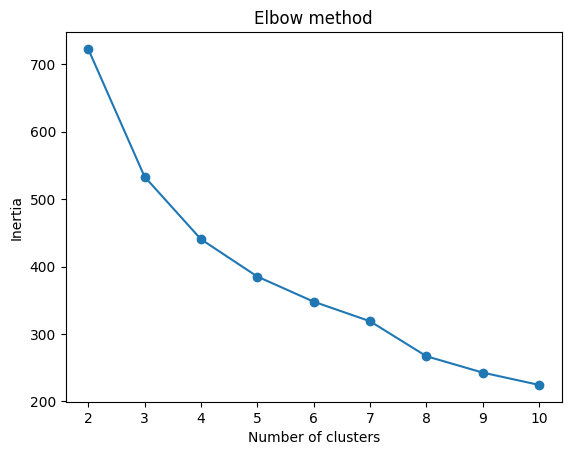

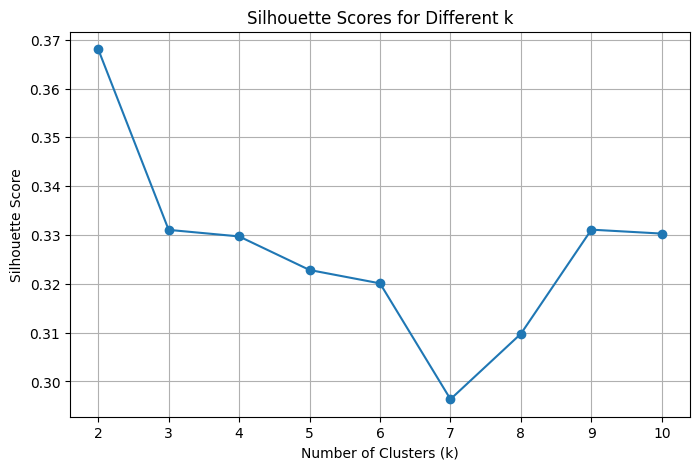

In [214]:
inertias = []
silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(num_df)
    inertias.append(kmeans.inertia_)
    silhouette.append(silhouette_score(num_df, kmeans.labels_))

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

plt.figure(figsize=(8, 5))
plt.plot(range(2,11), silhouette, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [215]:
# Analyzing all numeric columns together doesn't give any meaningfull clustering on titleType. 
kmeans = KMeans(n_clusters=8)
kmeans.fit(num_df)
df['clustering'] = kmeans.labels_
df[['clustering', 'titleTypeNumeric']].corr()
result = df.groupby('titleType')['clustering'].unique().reset_index()
result

,titleType,clustering
0,movie,"[4, 3, 6, 0, 7, 5, 1, 2]"
1,short,"[2, 0, 1, 4, 6, 5, 3]"
2,tvEpisode,"[2, 5, 3, 4, 0, 6, 1]"
3,tvMiniSeries,"[5, 4, 2, 7, 6, 0, 3]"
4,tvMovie,"[5, 2, 4, 0, 6, 3, 1, 7]"
5,tvSeries,"[0, 7, 6, 5, 2, 4, 3, 1]"
6,tvShort,"[2, 3, 4, 0, 5, 6]"
7,tvSpecial,"[2, 0, 4, 5, 6, 3, 7]"
8,video,"[2, 4, 5, 6, 0, 7]"
9,videoGame,"[4, 2, 0, 5, 6]"


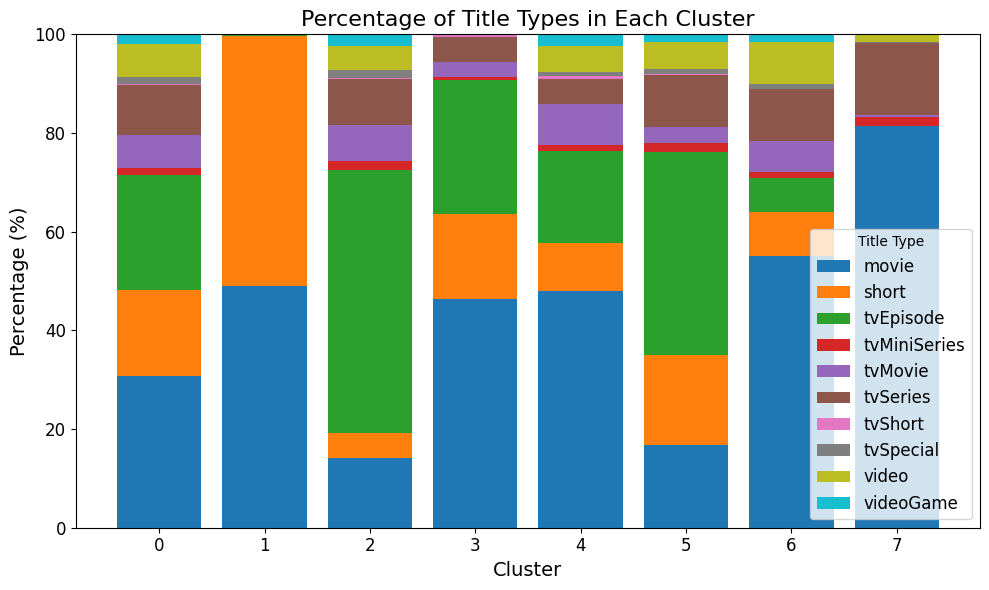

In [216]:
cluster_counts = pd.crosstab(df['clustering'], df['titleType'])

# Convert counts to percentages
cluster_percentages = cluster_counts.div(cluster_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
bottom = None  # Initial value for stacking

# Loop through each column (titleType) to stack bars
for title_type in cluster_percentages.columns:
    if bottom is None:
        bottom = cluster_percentages[title_type]
        plt.bar(cluster_percentages.index, cluster_percentages[title_type], label=title_type)
    else:
        plt.bar(cluster_percentages.index, cluster_percentages[title_type], bottom=bottom, label=title_type)
        bottom += cluster_percentages[title_type]

# Add labels and legend
plt.title('Percentage of Title Types in Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Title Type', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

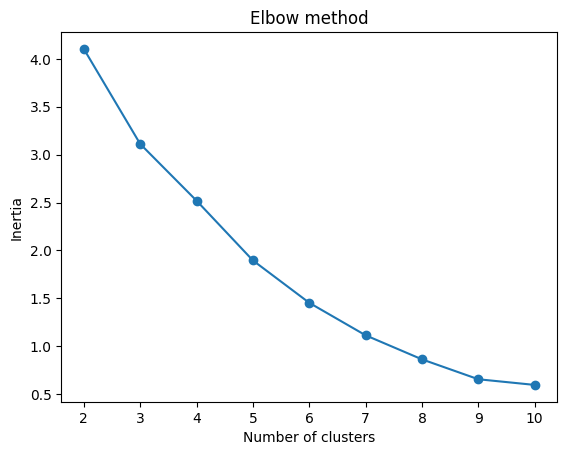

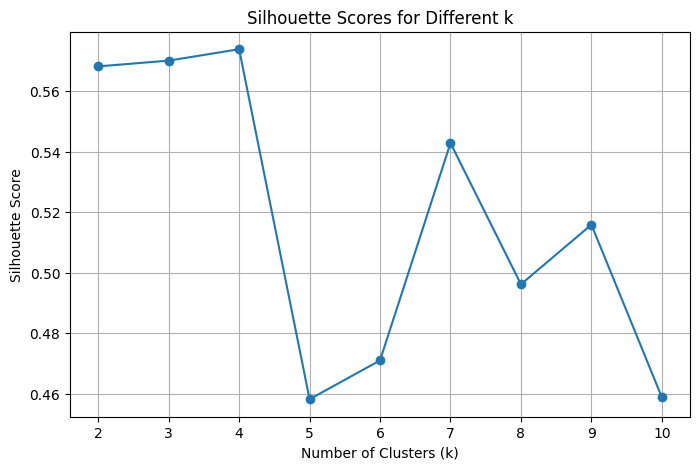

In [222]:
num_df_copy.head()
two_df = num_df_copy[['runtimeMinutes', 'totalCredits']]
two_df.head()

# Normalize numeric dataframe.
two_df = scaler.fit_transform(two_df)
inertias = []
silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(two_df)
    inertias.append(kmeans.inertia_)
    silhouette.append(silhouette_score(two_df, kmeans.labels_))

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

plt.figure(figsize=(8, 5))
plt.plot(range(2,11), silhouette, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [224]:
# Analyzing all numeric columns together doesn't give any meaningfull clustering on titleType. 
kmeans = KMeans(n_clusters=8)
kmeans.fit(num_df)
df['clustering'] = kmeans.labels_
df[['clustering', 'titleTypeNumeric']].corr()
result = df.groupby('titleType')['clustering'].unique().reset_index()
result


,titleType,clustering
0,movie,"[6, 1, 7, 0, 5, 4, 3, 2]"
1,short,"[3, 0, 4, 6, 2, 1, 7]"
2,tvEpisode,"[3, 2, 1, 6, 0, 7, 4]"
3,tvMiniSeries,"[2, 3, 6, 5, 7, 1, 0]"
4,tvMovie,"[2, 3, 6, 0, 1, 7, 5]"
5,tvSeries,"[0, 5, 7, 2, 3, 1, 6, 4]"
6,tvShort,"[3, 1, 0, 6, 2, 7]"
7,tvSpecial,"[3, 2, 0, 6, 1, 7, 5]"
8,video,"[2, 3, 6, 0, 7, 5]"
9,videoGame,"[6, 3, 2, 0, 7]"


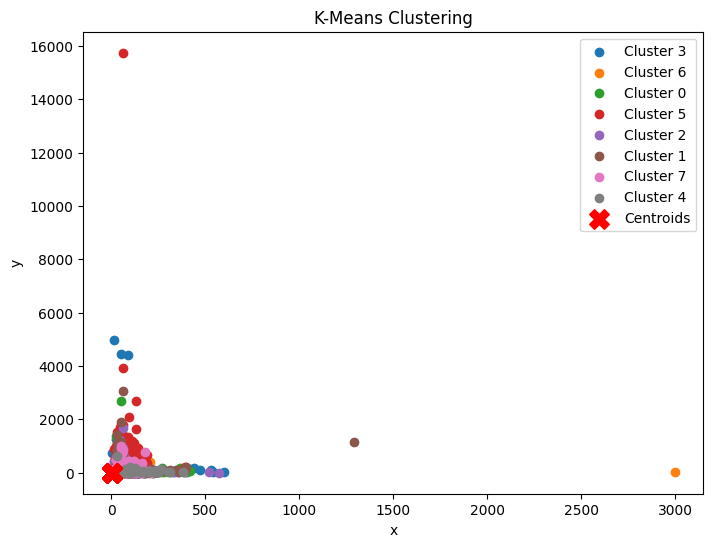

In [227]:
# Scatterplot of the clusters
plt.figure(figsize=(8, 6))
for cluster_id in df['clustering'].unique():
    cluster_data = df[df['clustering'] == cluster_id]
    plt.scatter(cluster_data['runtimeMinutes'], cluster_data['totalCredits'], label=f'Cluster {cluster_id}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()